# Análisis Exploratorio de Datos (EDA) 🚀

## 1. Introducción 📚
Fueron proporcionados tres datasets en formato de libro de excel. Los tres contaban con muchos datos faltantes que estaban representados por "SD", lo cual nos llevo a realizar una inspección profunda para depurar y quedarnos con los datos mas relevantes para nuestro analisis. 

### Descripción del Conjunto de Datos

- **Fuente de los Datos:** [ OMSV]
- **Periodo de los Datos:** [2016-2021]
- **Número de Registros:** 
  - [data_hechos: 23,341 registros]
  - [data_victimas: 24,490 registros]
  - [data_homicidios: 663 registros]


## 2. carga de datos 📥




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datasets desde archivos Excel
data_hechos = pd.read_excel(r'C:\Users\veram\OneDrive\Escritorio\analisis data\data_transformada\hechos.xlsx')  
data_victimas = pd.read_excel(r'C:\Users\veram\OneDrive\Escritorio\analisis data\data_transformada\victimas.xlsx')
data_homicidios = pd.read_excel(r'C:\Users\veram\OneDrive\Escritorio\analisis data\data_transformada\homicidios.xlsx')  


## 3. Inspección de los Datos 🔍


In [2]:
print(data_hechos.info())
print(data_hechos.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21650 entries, 0 to 21649
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_hecho           21650 non-null  object        
 1   cantidad_victimas  21650 non-null  int64         
 2   fecha              21650 non-null  datetime64[ns]
 3   año                21650 non-null  int64         
 4   mes                21650 non-null  int64         
 5   dia                21650 non-null  int64         
 6   hora               16884 non-null  object        
 7   longitud           21650 non-null  float64       
 8   latitud            21650 non-null  float64       
 9   victima            21650 non-null  object        
 10  acusado            21650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 1.8+ MB
None
       cantidad_victimas                          fecha           año  \
count       21650


### Victimas:

El promedio de cantidad de víctimas es de aproximadamente 1.15, lo que indica que la mayoría de los incidentes involucran una sola víctima.
La desviación estándar de 0.56 sugiere que hay incidentes con hasta 18 víctimas, aunque son casos excepcionales.


### Fecha:
La fecha mínima registrada es el 1 de enero de 2020 y la máxima es el 31 de diciembre de 2023, lo que indica que los datos abarcan un período de 4 años.
La mayoría de los incidentes ocurren en el primer semestre del año, dado que la media del mes es aproximadamente 6.53 (junio).
Coordenadas Geográficas:

### Coordenadas:
Las coordenadas de longitud y latitud tienen un rango limitado, lo que podría implicar que los incidentes están concentrados en una área geográfica específica.
La longitud varía entre aproximadamente -58.53 y -58.30, mientras que la latitud varía entre -34.73 y -34.53, indicando una localización probable en una región concreta, como en el área metropolitana de Buenos Aires.

In [3]:
print(data_victimas.info())
print(data_victimas.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21252 entries, 0 to 21251
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_hecho      21252 non-null  object        
 1   fecha         21252 non-null  datetime64[ns]
 2   año           21252 non-null  int64         
 3   victima       21252 non-null  object        
 4   sexo_victima  21252 non-null  object        
 5   edad_victima  21252 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 996.3+ KB
None
                               fecha           año  edad_victima
count                          21252  21252.000000  21252.000000
mean   2022-01-18 06:44:51.360813056   2021.553736     37.466050
min              2019-01-08 00:00:00   2019.000000      0.000000
25%              2021-02-21 00:00:00   2021.000000     26.000000
50%              2022-02-06 00:00:00   2022.000000     34.000000
75%           


**Edad:** El rango de edad y la media sugieren que las víctimas tienden a ser adultas, lo que puede ser relevante para identificar patrones en la demografía de las víctimas.
Distribución de Fechas: Con un rango de fechas extendido y un enfoque reciente, podrías analizar tendencias en los incidentes a lo largo del tiempo y cómo pueden estar relacionadas con factores socioeconómicos o políticas.


In [4]:
print(data_homicidios.info())
print(data_homicidios.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_hecho                663 non-null    object
 1   cantidad_victimas       663 non-null    int64 
 2   año                     663 non-null    int64 
 3   mes                     663 non-null    int64 
 4   día                     663 non-null    int64 
 5   hora                    663 non-null    object
 6   lugar_del_hecho         663 non-null    object
 7   tipo_de_calle           663 non-null    object
 8   Calle                   663 non-null    object
 9   direccion_normalizada   663 non-null    object
 10  comuna                  663 non-null    int64 
 11  geocodificacion_caba    663 non-null    object
 12  pos x                   663 non-null    object
 13  pos y                   663 non-null    object
 14  vehículo_participantes  663 non-null    object
 15  vehícu



**Rango:** El rango es de 1 a 3 víctimas por hecho, lo que sugiere que la mayoría de los hechos tienen un solo afectado, aunque hay algunos casos con más de una víctima.
**Promedio:** La media es aproximadamente 1.03, lo que confirma que los hechos suelen involucrar a una sola víctima.

In [5]:
# Conteo de valores faltantes
missing_hechos = data_hechos.isnull().sum()
missing_victimas = data_victimas.isnull().sum()
missing_homicidios = data_homicidios.isnull().sum()

print("Valores Faltantes en Hechos:\n", missing_hechos[missing_hechos > 0])
print("\nValores Faltantes en Víctimas:\n", missing_victimas[missing_victimas > 0])
print("\nValores Faltantes en Homicidios:\n", missing_homicidios[missing_homicidios > 0])

# Conteo de duplicados
print("\nDuplicados en Hechos:", data_hechos.duplicated().sum())
print("Duplicados en Víctimas:", data_victimas.duplicated().sum())
print("Duplicados en Homicidios:", data_homicidios.duplicated().sum())


Valores Faltantes en Hechos:
 hora    4766
dtype: int64

Valores Faltantes en Víctimas:
 Series([], dtype: int64)

Valores Faltantes en Homicidios:
 Series([], dtype: int64)

Duplicados en Hechos: 0
Duplicados en Víctimas: 929
Duplicados en Homicidios: 0


In [6]:
# Frecuencias de columnas categóricas
print("\nFrecuencia de 'año' en Hechos:\n", data_hechos['año'].value_counts())
print("\nFrecuencia de 'sexo_victima' en Víctimas:\n", data_victimas['sexo_victima'].value_counts())
print("\nFrecuencia de 'tipo_de_calle' en Homicidios:\n", data_homicidios['tipo_de_calle'].value_counts())



Frecuencia de 'año' en Hechos:
 año
2022    6853
2023    6824
2021    4471
2020    3502
Name: count, dtype: int64

Frecuencia de 'sexo_victima' en Víctimas:
 sexo_victima
varon    14355
mujer     6897
Name: count, dtype: int64

Frecuencia de 'tipo_de_calle' en Homicidios:
 tipo_de_calle
avenida      418
calle        130
gral paz      59
autopista     56
Name: count, dtype: int64


In [7]:

# Corregir las inconsistencias en los nombres
data_victimas['sexo_victima'] = data_victimas['sexo_victima'].str.lower().str.strip().replace({'varon ': 'varon', 'mujer ': 'mujer'})

# Contar las frecuencias
frecuencia_sexo = data_victimas['sexo_victima'].value_counts()
print(frecuencia_sexo)


sexo_victima
varon    14355
mujer     6897
Name: count, dtype: int64


In [8]:

# Primero, agrupamos por año y sexo y contamos las víctimas
victimas_por_anio = data_victimas.groupby(['año', 'sexo_victima']).size().reset_index(name='cantidad')

# Luego, calculamos el total de víctimas por año
total_victimas_por_anio = victimas_por_anio.groupby('año')['cantidad'].sum().reset_index(name='total')

# Hacemos un merge para tener el total junto con la cantidad por sexo
victimas_por_anio = victimas_por_anio.merge(total_victimas_por_anio, on='año')

# Calculamos el porcentaje de cada sexo respecto al total
victimas_por_anio['porcentaje'] = (victimas_por_anio['cantidad'] / victimas_por_anio['total']) * 100

# Mostrar los resultados
print(victimas_por_anio)


    año sexo_victima  cantidad  total  porcentaje
0  2019        mujer        24     92   26.086957
1  2019        varon        68     92   73.913043
2  2020        mujer      1302   4441   29.317721
3  2020        varon      3139   4441   70.682279
4  2021        mujer      1857   5687   32.653420
5  2021        varon      3830   5687   67.346580
6  2022        mujer      1935   5671   34.120966
7  2022        varon      3736   5671   65.879034
8  2023        mujer      1779   5361   33.184107
9  2023        varon      3582   5361   66.815893


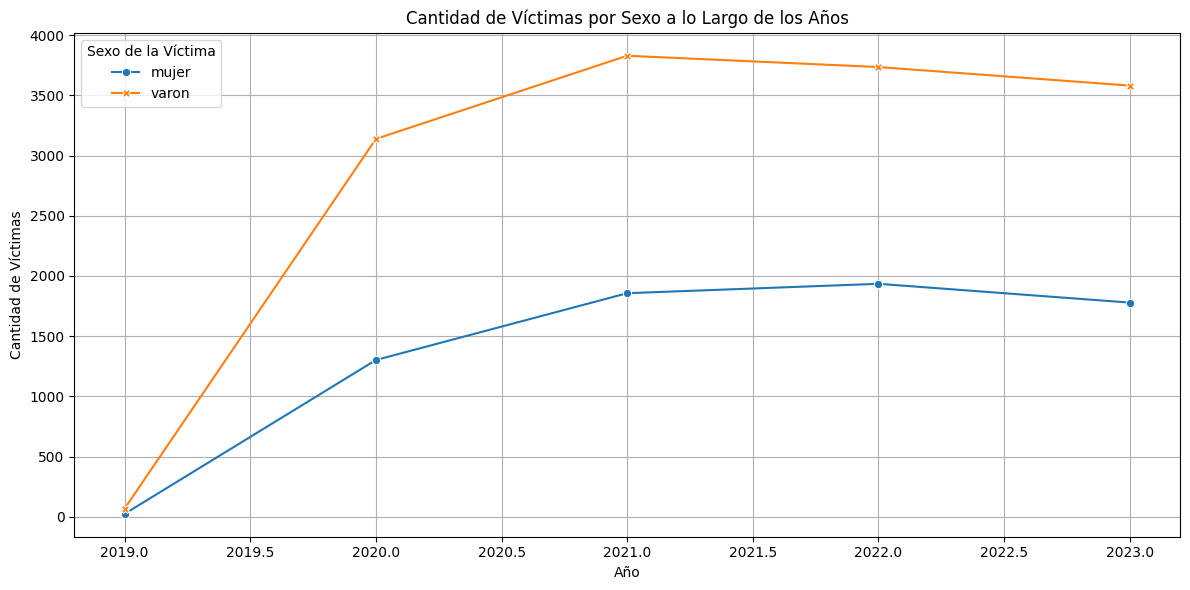

In [9]:

# Primero, agrupamos por año y sexo y contamos las víctimas
victimas_por_anio = data_victimas.groupby(['año', 'sexo_victima']).size().reset_index(name='cantidad')

# Luego, calculamos el total de víctimas por año
total_victimas_por_anio = victimas_por_anio.groupby('año')['cantidad'].sum().reset_index(name='total')

# Hacemos un merge para tener el total junto con la cantidad por sexo
victimas_por_anio = victimas_por_anio.merge(total_victimas_por_anio, on='año')

# Calculamos el porcentaje de cada sexo respecto al total
victimas_por_anio['porcentaje'] = (victimas_por_anio['cantidad'] / victimas_por_anio['total']) * 100

# Pivotamos los datos para que cada sexo sea una columna
victimas_pivot = victimas_por_anio.pivot(index='año', columns='sexo_victima', values='cantidad').fillna(0)

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=victimas_pivot, dashes=False, markers=True)
plt.title('Cantidad de Víctimas por Sexo a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.legend(title='Sexo de la Víctima')
plt.grid()
plt.tight_layout()
plt.show()



**conclusiones:**
A lo largo de los años podemos ver que el numero de victimas del género masculino es mayor que el de victimas femeninas en los accidentes viales.

In [10]:
# Limpiar los nombres de las columnas
data_victimas.columns = data_victimas.columns.str.strip()


<Figure size 1200x600 with 0 Axes>

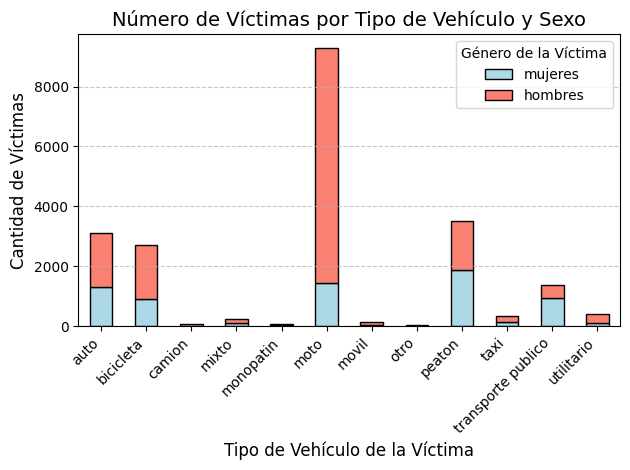

In [18]:


# Contar el número de víctimas por tipo de vehículo y sexo
victims_vehicle_sex_count = data_victimas.groupby(['victima', 'sexo_victima']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 6))

victims_vehicle_sex_count.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')

# Añadir etiquetas
plt.title('Número de Víctimas por Tipo de Vehículo y Sexo', fontsize=14)
plt.xlabel('Tipo de Vehículo de la Víctima', fontsize=12)
plt.ylabel('Cantidad de Víctimas', fontsize=12)
plt.legend(title='Género de la Víctima', labels=['mujeres', 'hombres'], loc='upper right')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()



**conclusiones:** Nos muestra claramente que el vehiculo con mas accidentes es la **MOTO** tambien nos muestra que los hombre lideran notablemente el resto de vehiculos accidentados. 

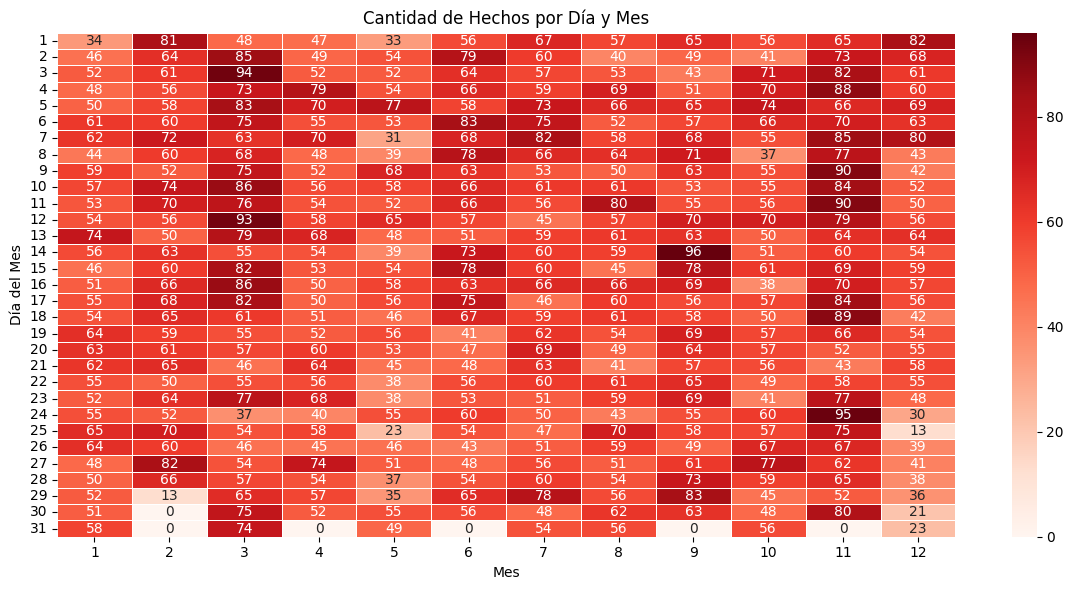

In [15]:
# Crear un pivot table para los accidentes por mes y día
heatmap_data = data_hechos.pivot_table(index='dia', columns='mes', values='id_hecho', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d', linewidths=.5)
plt.title('Cantidad de Hechos por Día y Mes')
plt.xlabel('Mes')
plt.ylabel('Día del Mes')
plt.tight_layout()
plt.show()



**conclusión:** los primeros días del mes de marzo y el mes de noviembre son los dias con mayor numero de siniestros.


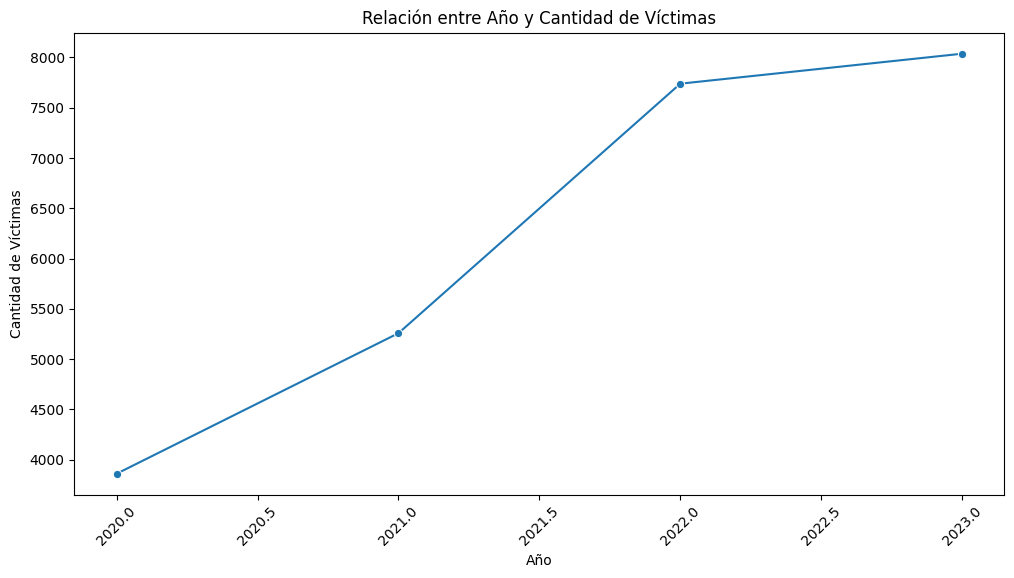

In [16]:

# Agrupar los datos por año y sumar la cantidad de víctimas
victimas_por_año = data_hechos.groupby('año')['cantidad_victimas'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=victimas_por_año, x='año', y='cantidad_victimas', marker='o')
plt.title('Relación entre Año y Cantidad de Víctimas')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)

# Asegurarse de que el eje Y muestre solo enteros
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()


**conclusiones:** La distribución de víctimas por sexo muestra que los hombres representan una mayoría significativa en los accidentes viales, lo cual sugiere que tienen una mayor probabilidad de estar involucrados en siniestros viales.


**Implicación:** Es importante enfocar las campañas de concientización y las medidas de seguridad vial hacia los grupos de mayor riesgo, en este caso, los hombres, ya que suelen ser conductores o participantes más frecuentes en accidentes graves.

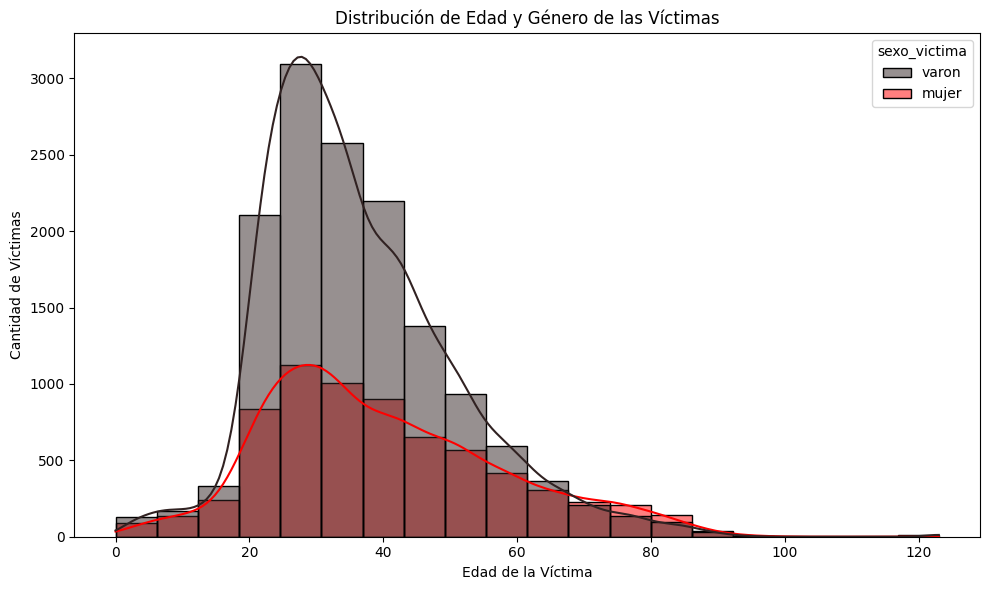

In [19]:
# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_victimas, x='edad_victima', hue='sexo_victima', bins=20, palette='dark:red', kde=True)

# Configurar título y etiquetas
plt.title('Distribución de Edad y Género de las Víctimas')
plt.xlabel('Edad de la Víctima')
plt.ylabel('Cantidad de Víctimas')

# Ajustar la visualización
plt.tight_layout()
plt.show()




**Conclusión:**  Las personas jóvenes (en edades de 18 a 4o años) suelen ser las más afectadas, lo que puede estar relacionado con comportamientos de mayor riesgo, como el exceso de velocidad o la conducción bajo efectos del alcohol.
Implicación: Las campañas de concientización deben estar dirigidas a este grupo etario, incluyendo intervenciones educativas y controles específicos de alcohol y velocidad.

In [ ]:
data_hechos

,id_hecho,cantidad_victimas,fecha,año,mes,dia,hora,longitud,latitud,victima,acusado
0,lc-2020-0038050,1,2020-01-18,2020,1,18,14:10:00,-58.455745,-34.638128,moto,objeto fijo
1,lc-2020-0068252,1,2020-02-01,2020,2,1,11:30:00,-58.438908,-34.650648,moto,utilitario
2,lc-2020-0098525,1,2020-02-14,2020,2,14,12:45:00,-58.443068,-34.545485,moto,auto
3,lc-2020-0244615,1,2020-05-17,2020,5,17,21:00:00,-58.299633,-34.728907,moto,auto
4,lc-2020-0375725,1,2020-06-29,2020,6,29,05:50:00,-58.466414,-34.650850,movil,auto
...,...,...,...,...,...,...,...,...,...,...,...
21645,lc-2023-0751507,1,2023-12-29,2023,12,29,14:00:00,-58.370488,-34.601895,auto,camion
21646,lc-2023-0750481,1,2023-12-29,2023,12,29,11:25:00,-58.373550,-34.581200,bicicleta,auto
21647,lc-2023-0009017,1,2023-12-29,2023,12,29,17:00:00,-58.380970,-34.603640,bicicleta,utilitario
21648,lc-2023-0751760,1,2023-12-29,2023,12,29,20:00:00,-58.373360,-34.582900,moto,auto


Distribución Horaria de los Accidentes:

Conclusión Principal: Los siniestros suelen concentrarse en horarios específicos, como las horas pico de tráfico (mañana y tarde) o en la madrugada, lo cual podría estar relacionado con la fatiga, el consumo de alcohol, o una mayor densidad vehicular.
Implicación: Es crucial reforzar las medidas de control durante las horas críticas para prevenir accidentes, como mayor presencia policial y control de velocidad en horarios de mayor riesgo.

In [25]:
# Verificar los datos únicos en la columna 'mes'
print(data_hechos['mes'].unique())


[ 1  2  5  6  7  9 11  3  4  8 12 10]


C:\Users\veram\AppData\Local\Temp\ipykernel_16336\3413150623.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values, palette=palette)


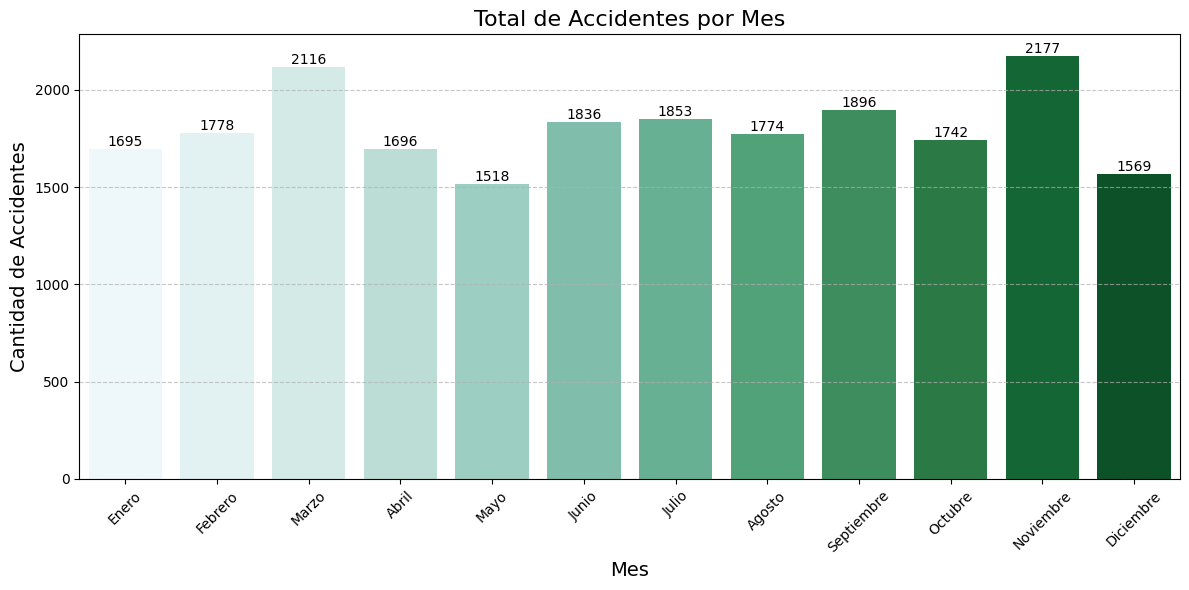

In [26]:
# Convertir la columna 'mes' a nombres de meses si es necesario
mes_mapping = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Si la columna 'mes' contiene números, conviértelos a nombres
data_hechos['mes'] = data_hechos['mes'].map(mes_mapping)

# Crear una tabla de conteo y ordenarla por mes
accidents_per_month = data_hechos['mes'].value_counts().reindex([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
])

# Graficar
plt.figure(figsize=(12, 6))
# Usar una paleta de colores más variada
palette = sns.color_palette("BuGn", len(accidents_per_month))

ax = sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values, palette=palette)

# Añadir etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Configurar título y etiquetas
plt.title('Total de Accidentes por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Accidentes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula
plt.tight_layout()
plt.show()





**Conclusion:** Se observa una variación en el número de accidentes a lo largo de los meses del año, posiblemente con picos en meses específicos en este caso es el mes de noviembre en primer lugar y el segundo mes con mayor incidentes es marzo.


**Implicación:** Las campañas de prevención y los operativos de control de tránsito pueden intensificarse en los meses con mayor número de accidentes para reducir la probabilidad de siniestros.

In [27]:
# Reemplazar 'General Paz' por 'Autopista' en la columna 'tipo_de_calle'
data_homicidios['tipo_de_calle'] = data_homicidios['tipo_de_calle'].replace('gral paz', 'autopista')
# Reemplazar 'General Paz' por 'Autopista' en la columna 'tipo_de_calle'
data_homicidios['tipo_de_calle'] = data_homicidios['tipo_de_calle'].replace('Autopista', 'autopista')


C:\Users\veram\AppData\Local\Temp\ipykernel_16336\1142053710.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=accidents_per_street_type.index, y=accidents_per_street_type.values, palette=colors)
C:\Users\veram\AppData\Local\Temp\ipykernel_16336\1142053710.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(x=accidents_per_street_type.index, y=accidents_per_street_type.values, palette=colors)


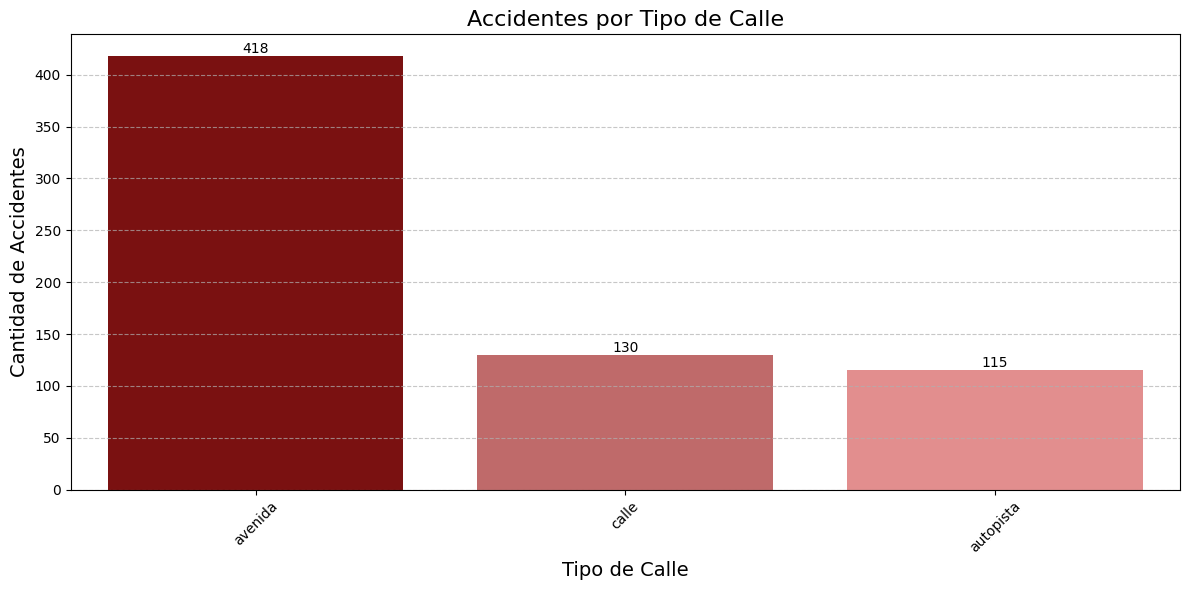

In [28]:

# Contar accidentes por tipo de calle
accidents_per_street_type = data_homicidios['tipo_de_calle'].value_counts()

# Crear el gráfico con una paleta personalizada de tonos rojos
plt.figure(figsize=(12, 6))
colors = ['#8B0000', '#CD5C5C', '#F08080', '#FFB6C1', '#FF7F50']  # Colores en tonos de rojo
ax = sns.barplot(x=accidents_per_street_type.index, y=accidents_per_street_type.values, palette=colors)

# Añadir etiquetas encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Configurar título y etiquetas
plt.title('Accidentes por Tipo de Calle', fontsize=16)
plt.xlabel('Tipo de Calle', fontsize=14)
plt.ylabel('Cantidad de Accidentes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de cuadrícula

# Mejorar la leyenda
plt.tight_layout()
plt.show()



**conclusion:** Podemos observar claramente que el mayor numero de accidentes viales se produce en las avenidas, las cuales se caracterizan por tener dos sentidos de circulación, lo que podría estar relacionado con una mayor cantidad de tráfico o velocidades más altas.

**Implicación:** Implementar mayores controles en las zonas identificadas como puntos críticos de siniestros, como mejoras en la señalización, iluminación o rediseño urbano para aumentar la seguridad.

C:\Users\veram\AppData\Local\Temp\ipykernel_16336\2829447581.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victims_per_street.index[:10], y=victims_per_street.values[:10], palette='Purples')


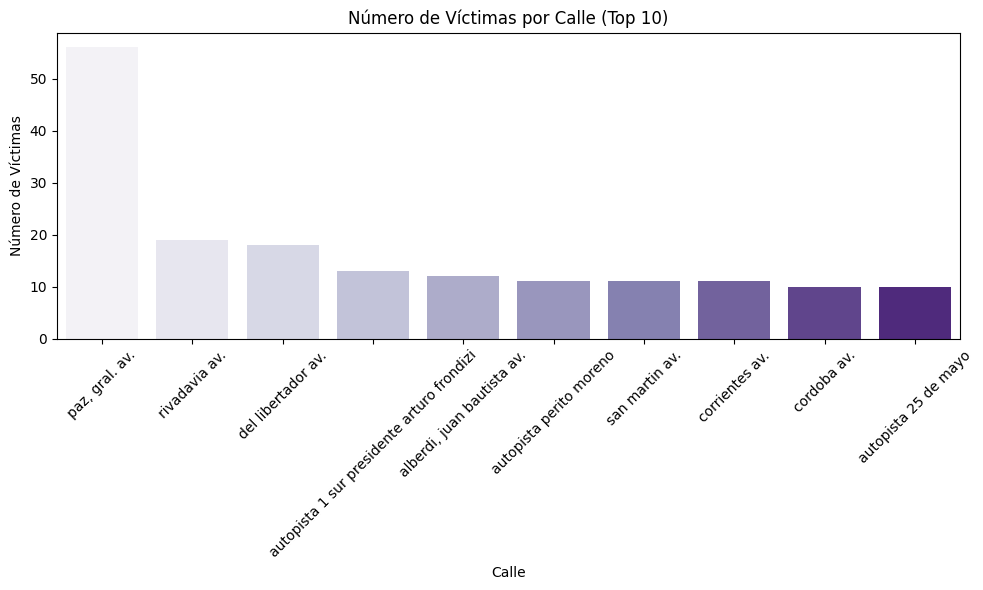

In [29]:


# 7. Número de víctimas por calle en data_homicidios
victims_per_street = data_homicidios.groupby('Calle')['cantidad_victimas'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=victims_per_street.index[:10], y=victims_per_street.values[:10], palette='Purples')
plt.title('Número de Víctimas por Calle (Top 10)')
plt.xlabel('Calle')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Conclusión:** Los siniestros ocurren con mayor frecuencia en estas calles, las cuales ameritan mejor señalamiento y desarrollo de estrategias para disminuir los insidentes. 


C:\Users\veram\AppData\Local\Temp\ipykernel_16336\4102429315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_victims_per_year.index, y=accidents_by_victims_per_year.values, palette='coolwarm')


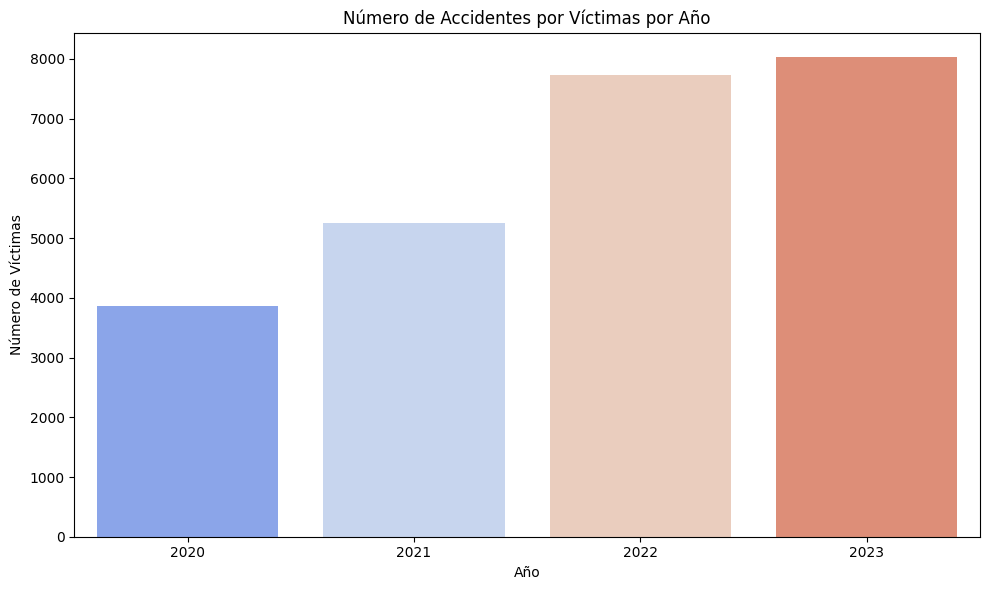

In [30]:

# 8. Número de accidentes por víctimas por año
accidents_by_victims_per_year = data_hechos.groupby('año')['cantidad_victimas'].sum().sort_index(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_victims_per_year.index, y=accidents_by_victims_per_year.values, palette='coolwarm')
plt.title('Número de Accidentes por Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.tight_layout()
plt.show()

## conclusiones generales:

**Participación de Vehículos:**

*Conclusión Principal:* El análisis de los vehículos involucrados revela que ciertos tipos de vehículos, como automóviles y motocicletas, tienen una participación desproporcionada en los accidentes. Las motocicletas, en particular, pueden estar sobre-representadas en los accidentes graves.
Implicación: Este hallazgo indica la necesidad de campañas específicas para conductores de motocicletas, así como posibles reformas en la normativa de tránsito para este tipo de vehículos.

**Cantidad de Víctimas por Accidente:**

*Conclusión Principal:* La mayoría de los accidentes involucran una única víctima, aunque hay una cantidad notable de incidentes con múltiples víctimas, lo que resalta la gravedad de ciertos siniestros.
Implicación: Es fundamental entender las características de los accidentes más graves para diseñar políticas específicas que reduzcan la probabilidad de siniestros con múltiples víctimas.

### Recomendaciones:
**Enfoque en Grupos Vulnerables:** Dado que los hombres jóvenes son el grupo más afectado, las intervenciones deben centrarse en esta población.
**Mejora de la Recolección de Datos:** Se deben mejorar los datos donde haya un número considerable de valores desconocidos o no reportados, como el sexo de la víctima o los detalles del accidente.
**Monitoreo Temporal:** Es crucial reforzar las medidas de control y prevención en los horarios y meses críticos donde se concentra la mayoría de los accidentes.
**Reducción de Siniestros Graves:** Evaluar las características de los accidentes con múltiples víctimas para entender mejor qué factores contribuyen a la gravedad y trabajar en mitigarlos.

**Estas conclusiones proporcionan un panorama claro de los patrones y puntos críticos relacionados con los siniestros viales en Buenos Aires, y ofrecen una base sólida para el diseño de políticas públicas más efectivas.**